In [1]:
#import tensorflow as tf
#from keras.backend.tensorflow_backend import set_session

#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#sess = tf.Session(config=config)
#set_session(sess)

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)#

    except RuntimeError as e:
        print(e)

In [3]:
"""

This is for morphological classification of galaxies by CNN,
By Kenji Bekki, on 2017/11/15
Revised on 2020/2/14 (Nair & Abraham 2010)
For test only.

"""

from keras.models import model_from_json
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib notebook
mpl.rcParams['figure.figsize'] = [10, 10]
mpl.rcParams['figure.dpi'] = 72

%run ../data_preparation/FILE_IO_FUNCTIONS.ipynb
count = 1000
x = load_data(data="NAIR_ABRAHAM_2010")

TTypes = load_attribute(data="NAIR_ABRAHAM_2010")

EInd = np.where(TTypes == -5)[0]

x = x[EInd]

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

y_pred_prob = loaded_model.predict(x)

y_pred = y_pred_prob.argmax(axis=1)

Loaded model from disk


<IPython.core.display.Javascript object>


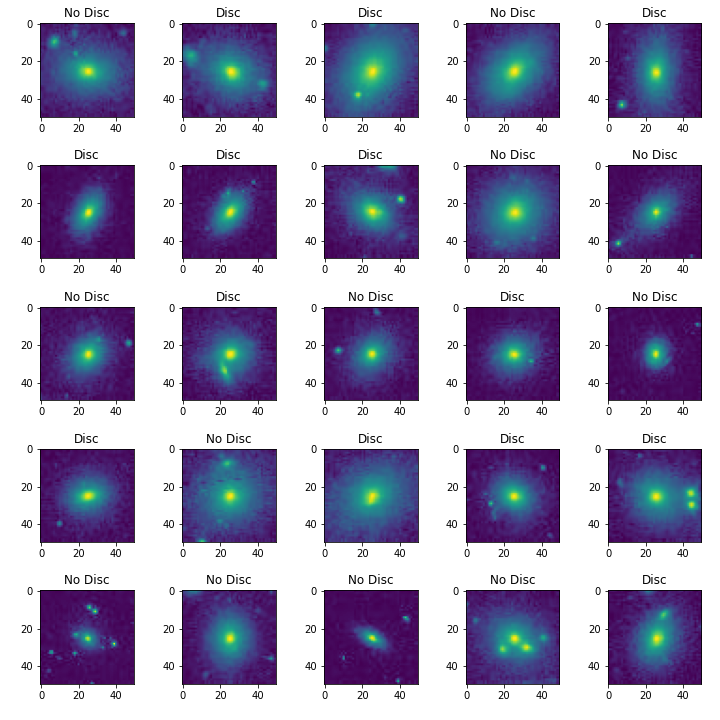

[2063 2061 1356 2563 1806 1613 1421  868 1649 1704 1586   96  731  686
 2058 1320  160  820 2579 1965  866 2532  586 2473  407]
[[   0 1178]
 [   1 1545]]


In [11]:
%run ..\helpers\plotting_helpers.ipynb
plot_classification_results(images=x, y_preds=y_pred, y_labels=("No Disc", "Disc"), random_sample=True)

unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

In [ ]:
import pandas as pd
fp = r"C:\Users\James_Dev_Account\OneDrive - The University of Western Australia\Documents\Honours - Galaxy Classification\Galaxy-Classification-Research-Project\generated_data\nair_abraham_2010\NairAbrahamMorphology.cat"
df = pd.read_csv(fp, '\s+', usecols=['TType'])
df.head()